In [520]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [257]:
train = pd.read_csv('../source_data/train.csv')
test = pd.read_csv('../source_data/test.csv')

In [258]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [259]:
train.shape

(1460, 81)

In [260]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Divide by data type

In [261]:
cat_features = train.select_dtypes(include=['object']).columns.to_list()
print(f'Object types:  {len(cat_features)}')
print(cat_features)

Object types:  43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [262]:
num_features = train.select_dtypes(include=['int64','float64']).columns.to_list()
print(f'Numeric types:  {len(num_features)}')
print(num_features)

Numeric types:  38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [263]:
# Some numeric features are categorical by nature (TBD later on being potentially ordinal):
train['MSSubClass'] = train.MSSubClass.apply(lambda x: str(x))
train['MoSold'] = train.MoSold.apply(lambda x: str(x))
train['YrSold'] = train.YrSold.apply(lambda x: str(x))

In [264]:
cat_features += ['MSSubClass', 'MoSold', 'YrSold']
print(f'Object types:  {len(cat_features)}')

Object types:  46


In [265]:
# Also remove ID and SalePrice from the features
not_numeric = ['Id', 'SalePrice', 'MSSubClass', 'MoSold', 'YrSold']
num_features = [f for f in num_features if f not in not_numeric] 
print(f'Numeric types:  {len(num_features)}')

Numeric types:  33


In [266]:
print(cat_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold', 'YrSold']


In [267]:
print(num_features)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


### Classify Ordinal vs. Nominal

By default, all categorical features are nominal.  The following are classified ordinal:
- levels are clearly ordered (e.g. Functional, LandSlope, LotShape). This is regardless of the feature's correlation with price, e.g. may be completely uncorrelated. 
- if we __suspect__ order, verify by a boxplot Price~Feature (e.g. 'MSSubClass'). Classify as ordinal only if there is visual correlation with sorted levels

In [268]:
cat_ordinal = [  # definitely ordinal
'Street',
'Alley',
'LotShape',
'Utilities',
'LandSlope',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
]
print(f'Definitely ordinal:  {len(cat_ordinal)}')

Definitely ordinal:  22


In [269]:
cat_ordinal_candidates = [ # potentially ordinal
'MSSubClass',
'LandContour',
'LotConfig',
'BldgType',    
'HouseStyle',    
'Foundation',
'Electrical',
'Fence',
'SaleType',
'SaleCondition'    
]
print(f'Potentially ordinal:  {len(cat_ordinal_candidates)}')

Potentially ordinal:  10


In [270]:
cat_nominal = [f for f in cat_features if f not in cat_ordinal and f not in cat_ordinal_candidates] 
print(f'Nominal features:  {len(cat_nominal)}')
cat_nominal

Nominal features:  14


['MSZoning',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Heating',
 'GarageType',
 'MiscFeature',
 'MoSold',
 'YrSold']

In [271]:
# We care about display order for the candidate ordinals:
display_order = {
'MSSubClass': ['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '160', '180', '190'],
'LandContour': ['Lvl','Bnk', 'HLS', 'Low'],
'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
'BldgType':    ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
'HouseStyle':  ['1Story', '1.5Unf', '1.5Fin', '2Story', '2.5Unf', '2.5Fin', 'SFoyer', 'SLvl'],    
'Foundation': ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'],
'Electrical': ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'],
'Fence': ['GdPrv','MnPrv','GdWo', 'MnWw','NA'],
'SaleType': ['WD','CWD','New','COD','Con','ConLw','ConLI','ConLD','Oth'],
'SaleCondition': ['Normal','Abnorml','AdjLand','Alloca','Family','Partial'],
}

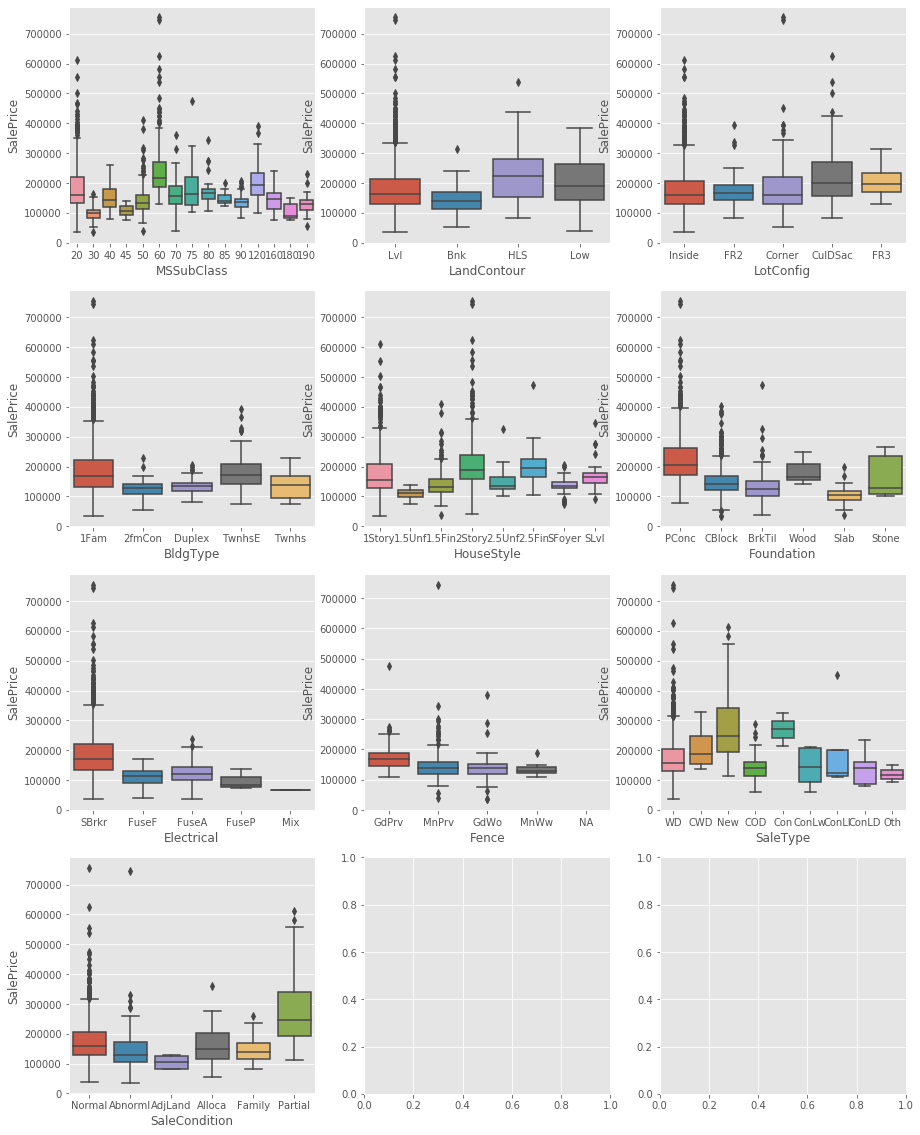

In [272]:
# plt.subplots(nrows, ncols, figsize=(width, height))
nc, nr  = 3, 1+len(cat_ordinal_candidates)//nc
f,axes = plt.subplots(nr, nc, figsize=(nc*5, nr*5))

counter = 0
for f in cat_ordinal_candidates:
    sns.boxplot(f, 'SalePrice', data=train, order=display_order[f], ax = axes[counter//n][counter%n])
    counter+=1

Conclusion: there is no internal order that would cause a visible correlation with the Price. All candidate features should be classified as nominal

In [273]:
cat_nominal = cat_nominal + cat_ordinal_candidates
print(f'Nominal features:  {len(cat_nominal)}')
print(f'Ordinal features:  {len(cat_ordinal)}')

Nominal features:  24
Ordinal features:  22


### Categorical features: Impute nan

Verify each categorical feature to apply the following approach:
- nominal features: replace nan with string 'None' unless has specific meaning
- ordinal features: replace nan with 0 unless nan means something else. Nan typically means the absence of the feature such as 'no garage'.  Later, map the remaining levels to 1,2,..

In [274]:
for f in cat_nominal:
    nans = train[f].isna().sum()
    if nans>0:
        print(f'{nans}   nans in   {f}')

8   nans in   MasVnrType
81   nans in   GarageType
1406   nans in   MiscFeature
1   nans in   Electrical
1179   nans in   Fence


In [275]:
for f in cat_ordinal:
    nans = train[f].isna().sum()
    if nans>0:
        print(f'{nans}   nans in   {f}')

1369   nans in   Alley
37   nans in   BsmtQual
37   nans in   BsmtCond
38   nans in   BsmtExposure
37   nans in   BsmtFinType1
38   nans in   BsmtFinType2
690   nans in   FireplaceQu
81   nans in   GarageFinish
81   nans in   GarageQual
81   nans in   GarageCond
1453   nans in   PoolQC


Checked all missing columns, the default approach of replacing with 'None' and 0 should work

In [276]:
for f in cat_nominal:
    train[f].fillna('None', inplace=True)

In [277]:
for f in cat_ordinal:
    train[f].fillna(0, inplace=True)

### Map Ordinal to numeric

In [278]:
# NB map the FULL dictionary from the description b/c some labels may appear only in the test set
# still, check unique levels for all ordinals in the train set
{f: list(train[f].unique()) for f in cat_ordinal}

{'Street': ['Pave', 'Grvl'],
 'Alley': [0, 'Grvl', 'Pave'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'BsmtQual': ['Gd', 'TA', 'Ex', 0, 'Fa'],
 'BsmtCond': ['TA', 'Gd', 0, 'Fa', 'Po'],
 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', 0],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 0, 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', 0, 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'CentralAir': ['Y', 'N'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'Functional': ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'],
 'FireplaceQu': [0, 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', 0],
 'GarageQual': ['TA', 'Fa', 'Gd', 0, 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', 0, 'Gd', 'Po', 'Ex'],
 'PavedDrive': ['Y', 'N', 'P'],
 'PoolQC': [0, 'Ex', 'Fa', 'Gd']}

In [279]:
# Mapping convention: higher levels ~ higher price (NOT always applicable, e.g. LotShape)
# arbitrary convention for the sake of interpretation consistency, should not affect any ML
ordinal_to_numeric = {
    'Street': {'Grvl':1, 'Pave':2},
    'Alley': {'Grvl':1, 'Pave':2},
    'LotShape': {'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4},
    'Utilities': {'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4},
    'LandSlope': {'Gtl':1, 'Mod':2, 'Sev':3},

    'ExterQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'ExterCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},

    'BsmtQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtExposure': {'No':1, 'Mn':2, 'Av':3, 'Gd':4},
    'BsmtFinType1': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'BsmtFinType2': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},

    'HeatingQC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'CentralAir': {'N':0, 'Y':1},
    'KitchenQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    # bigger step for 'Typical'
    'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':10},  
    'FireplaceQu': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},

    'GarageFinish': {'Unf':1, 'RFn':2, 'Fin':3},
    'GarageQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},

    'PavedDrive': {'N':1, 'P':2, 'Y':3},
    'PoolQC': {'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
}

In [283]:
for f in ordinal_to_numeric:
    train[f].replace(ordinal_to_numeric[f], inplace=True)

In [285]:
# verify 
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,2,0,1,Lvl,4,...,0,0,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,2,0,1,Lvl,4,...,0,0,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,2,0,2,Lvl,4,...,0,0,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,2,0,2,Lvl,4,...,0,0,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,2,0,2,Lvl,4,...,0,0,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,2,0,2,Lvl,4,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,2,0,1,Lvl,4,...,0,0,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,2,0,2,Lvl,4,...,0,0,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,2,0,1,Lvl,4,...,0,0,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,2,0,1,Lvl,4,...,0,0,None,None,0,1,2008,WD,Normal,118000


## Adding new Boolean features

In [440]:
# Booleans
train['_Basement'] = train.TotalBsmtSF>0
train['_Garage'] = train.GarageArea>0
train['_Pool'] = train.PoolArea>0
train['_Fence'] = train.Fence!='None'
# combine 4 types of porches
train['_Porch'] = train.OpenPorchSF+train.EnclosedPorch+train['3SsnPorch']+train.ScreenPorch > 0

In [441]:
# More Booleans
train['_New'] = train.YearBuilt > 2000
train['_Remodeled'] = train.YearRemodAdd != train.YearBuilt
train['_NormalSale'] = train.SaleCondition=='Normal'

In [444]:
new_boolean = ['_Basement', '_Garage', '_Pool', '_Fence', '_Porch', '_New', '_Remodeled', '_NormalSale']

In [445]:
for f in new_boolean:
    train[f]=train[f].astype(np.int64)

## Clustering: Categorical

In [ ]:
# (optionally add TSNE / UMAP)

In [437]:
all_categorical = cat_nominal + cat_ordinal + new_boolean

In [438]:
chisq_table = np.zeros((len(all_categorical), len(all_categorical)))

for i, f1 in enumerate(all_categorical):
    for j, f2 in enumerate(all_categorical):
        tab = pd.crosstab(train[f1], train[f2])
        chisq_table[i,j] = scipy.stats.chi2_contingency(tab)[1]

sort_order = np.argsort(chisq_table.sum(axis=0))
chisq_table = chisq_table[:,sort_order]
chisq_table = chisq_table[sort_order,:]
heatmap_labels = [all_categorical[i] for i in sort_order]

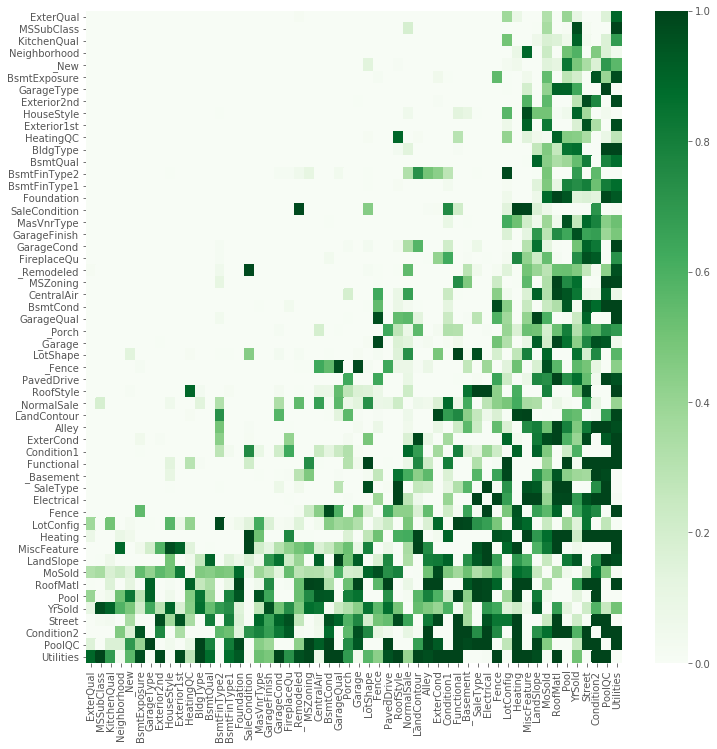

In [450]:
plt.figure(figsize=(12,12))
sns.heatmap(chisq_table, cmap="Greens", xticklabels=heatmap_labels, yticklabels=heatmap_labels)

- The core group of ~10-15 defining characteristics at the top, highly influential (ExterQual, MSSubClass, Neighborhood, New, etc)
- A few categories at the bottom seem to be randomly spread -> candidates for removal (Utilities, PoolQC, YrSold, MoSold)

## ANOVA

Verify the clisytering intuition with ANOVA LogPrice~Category 

In [363]:
# ANOVA requires that the reponse variables be ~ normal. Log transform the SalePrice.

In [364]:
train['LogPrice']=np.log(train.SalePrice)

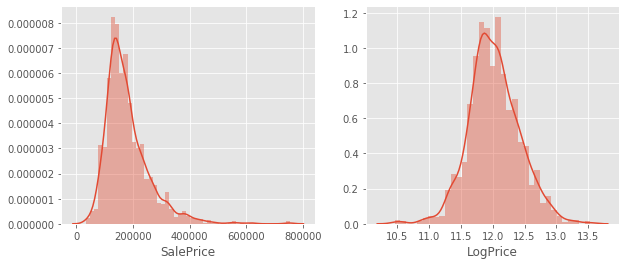

In [365]:
f,axes = plt.subplots(1, 2, figsize=(10, 4))

sns.distplot(train.SalePrice, ax=axes[0])
sns.distplot(train.LogPrice, ax=axes[1])

In [446]:
# ANOVA F-statistic with its p-value
F_values, p_values = {},{}

for f in all_categorical:
    group_prices = []
    for group in train[f].unique():
        group_prices.append(train[train[f]==group]['LogPrice'].values)

    F_values[f], p_values[f] = scipy.stats.f_oneway(*group_prices)

In [447]:
F_values = {k:v for k,v in sorted(F_values.items(), key=lambda x: x[1])}
p_values = {k:v for k,v in sorted(p_values.items(), key=lambda x: x[1])}

In [448]:
p_values

{'Neighborhood': 4.043303832360543e-243,
 'ExterQual': 6.935425362944559e-195,
 'BsmtQual': 2.031281939790327e-188,
 'KitchenQual': 4.441486382628392e-187,
 'GarageFinish': 4.0574576290308245e-151,
 'GarageType': 8.427845377348759e-125,
 'MSSubClass': 5.096022741004154e-115,
 'FireplaceQu': 6.963457634813553e-115,
 'Foundation': 1.3506710541411921e-111,
 '_New': 3.251253283919394e-84,
 'HeatingQC': 1.6148821620760695e-82,
 'BsmtFinType1': 4.321403736699806e-78,
 'MasVnrType': 1.670060794295124e-65,
 'MSZoning': 1.0213428543580432e-59,
 'Exterior1st': 1.0531276910218475e-53,
 'Exterior2nd': 2.4299379665258745e-49,
 'GarageCond': 2.508057924124717e-47,
 'BsmtExposure': 2.590707192162915e-47,
 'GarageQual': 6.0684056617209285e-46,
 'CentralAir': 9.855628007877155e-44,
 'SaleCondition': 1.6897076360289594e-41,
 '_Porch': 1.2584483153489537e-37,
 '_Garage': 8.411473139612348e-37,
 'SaleType': 5.497893082953038e-36,
 'PavedDrive': 1.090995386182895e-31,
 'HouseStyle': 1.6360765196503422e-30,

Possible candiates to remove with p-value >0.01:
- 'Condition2'
- 'Street'
- 'LandSlope'
- 'MoSold'
- 'YrSold'
- 'Utilities'

## Classify and Visualize

In [452]:
len(all_categorical)

54

In [466]:
cat_elements = [
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Heating',
 'GarageType',
 'MiscFeature',  # mainly shed
 
 'Foundation',
 'Electrical',
 'Fence',
 'Utilities',
 
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',

 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 '_Basement',
 '_Garage',
 '_Pool',
 '_Fence',
 '_Porch',
]

In [460]:
len(elements)

32

In [462]:
# [x for x in all_categorical if x not in elements]

In [468]:
cat_location = [
'MSZoning',
'Neighborhood',
'Condition1',
'Condition2',
]
                
cat_sale = [            
'SaleType',
'SaleCondition',
'_NormalSale',
'MoSold',
'YrSold',
]
    
cat_type = [
'MSSubClass',
'BldgType',
'HouseStyle',
'Functional',
'_Remodeled',
'_New',
]

cat_land = [    
'LotShape',
'LandSlope',
'LandContour',
'LotConfig',
'Street',
'Alley',
'PavedDrive',
]

In [471]:
# verify completeness
assert set(all_categorical)==set(cat_elements+cat_location+cat_sale+cat_type+cat_land)
assert len(all_categorical)==len(cat_elements+cat_location+cat_sale+cat_type+cat_land)

In [481]:
def plot_counts(cat_group, col_wrap=4):
    f = pd.melt(train, value_vars=cat_group)
    g = sns.FacetGrid(f, col='variable', col_wrap=col_wrap, sharex=False, sharey=False)
    g = g.map(sns.countplot, 'value')
    [plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
    g.fig.tight_layout()
    plt.show()    

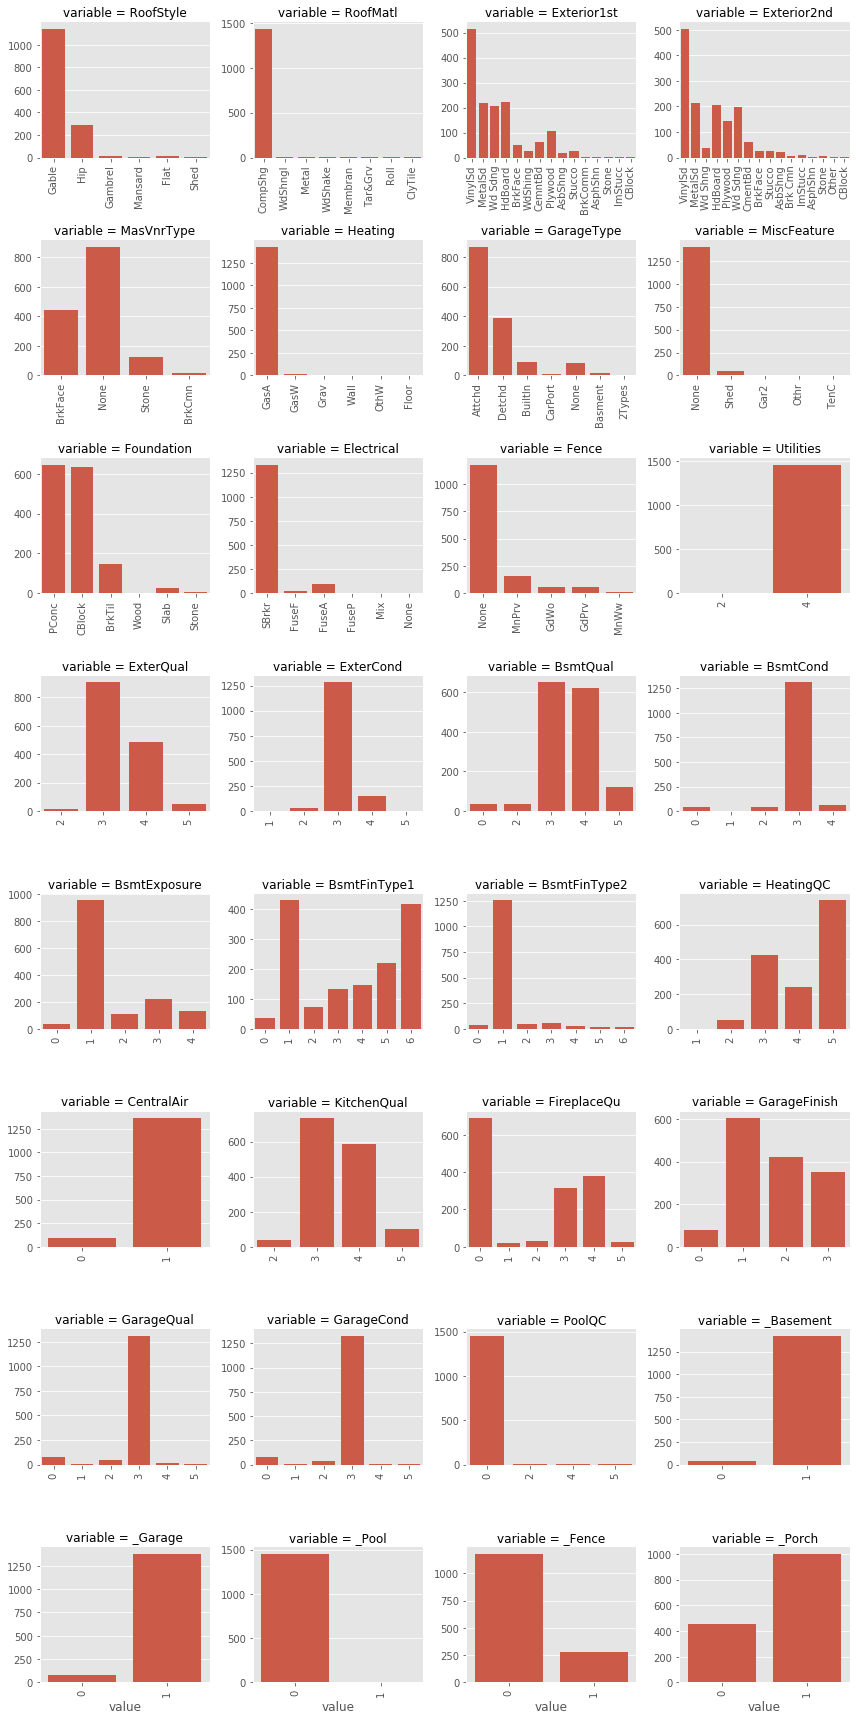

In [482]:
plot_counts(cat_elements)

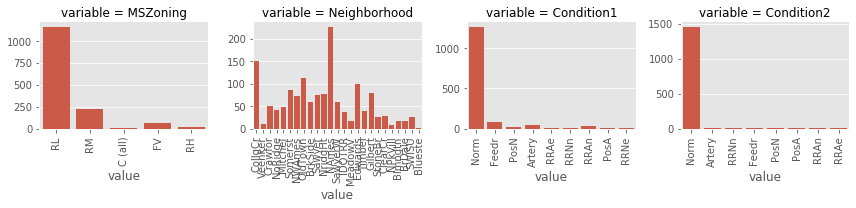

In [483]:
plot_counts(cat_location)

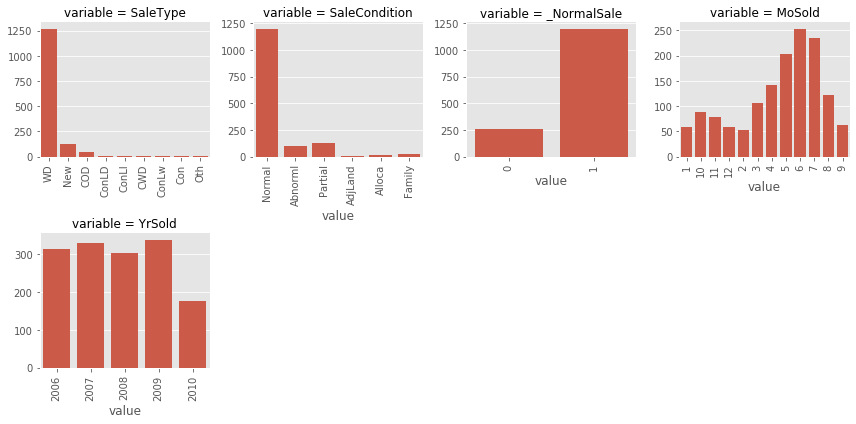

In [484]:
plot_counts(cat_sale)

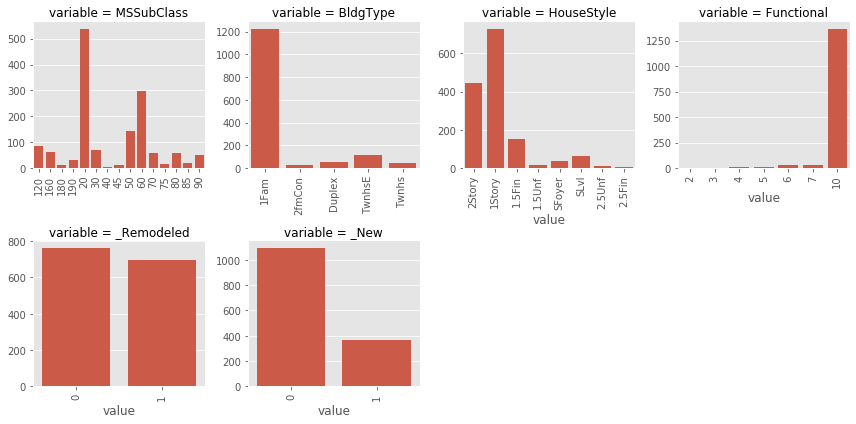

In [485]:
plot_counts(cat_type)

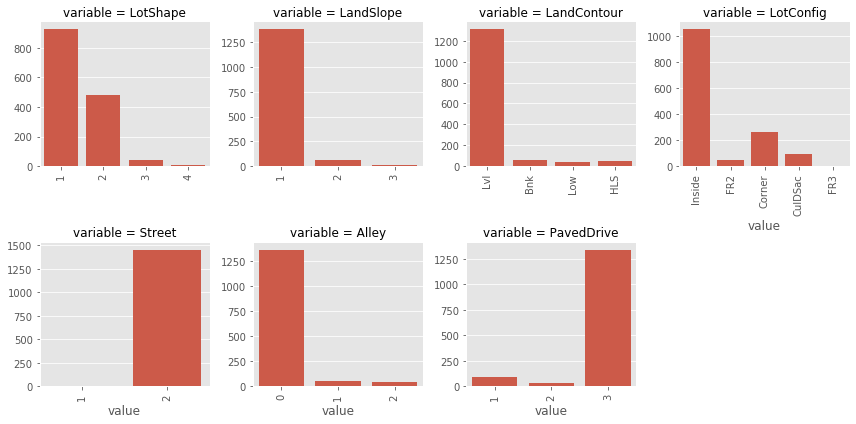

In [486]:
plot_counts(cat_land)

## Influential features

In [487]:
#Select least p-value features on the F-test. Visualize Boxplots (Price or LogPrice?)

In [517]:
cat_influential = [
# from cat_location
'Neighborhood',
'MSZoning',
# from the cat_sale
'SaleCondition',
'SaleType',    
# from cat_type
'MSSubClass',
'_New',
# zero from the cat_land
# from cat_elements    

'KitchenQual',
'FireplaceQu',
'Foundation',
'HeatingQC',
'CentralAir',    
'MasVnrType',
'_Porch',  
    
'Exterior1st',
'Exterior2nd',
'ExterQual',   
    
'GarageFinish',
'GarageType',
'GarageQual',    
'GarageCond',
'_Garage',    
    
'BsmtQual',
'BsmtExposure',    
'BsmtFinType1',    
]
print(f'Inflential features:  {len(cat_influential)}')


Inflential features:  24


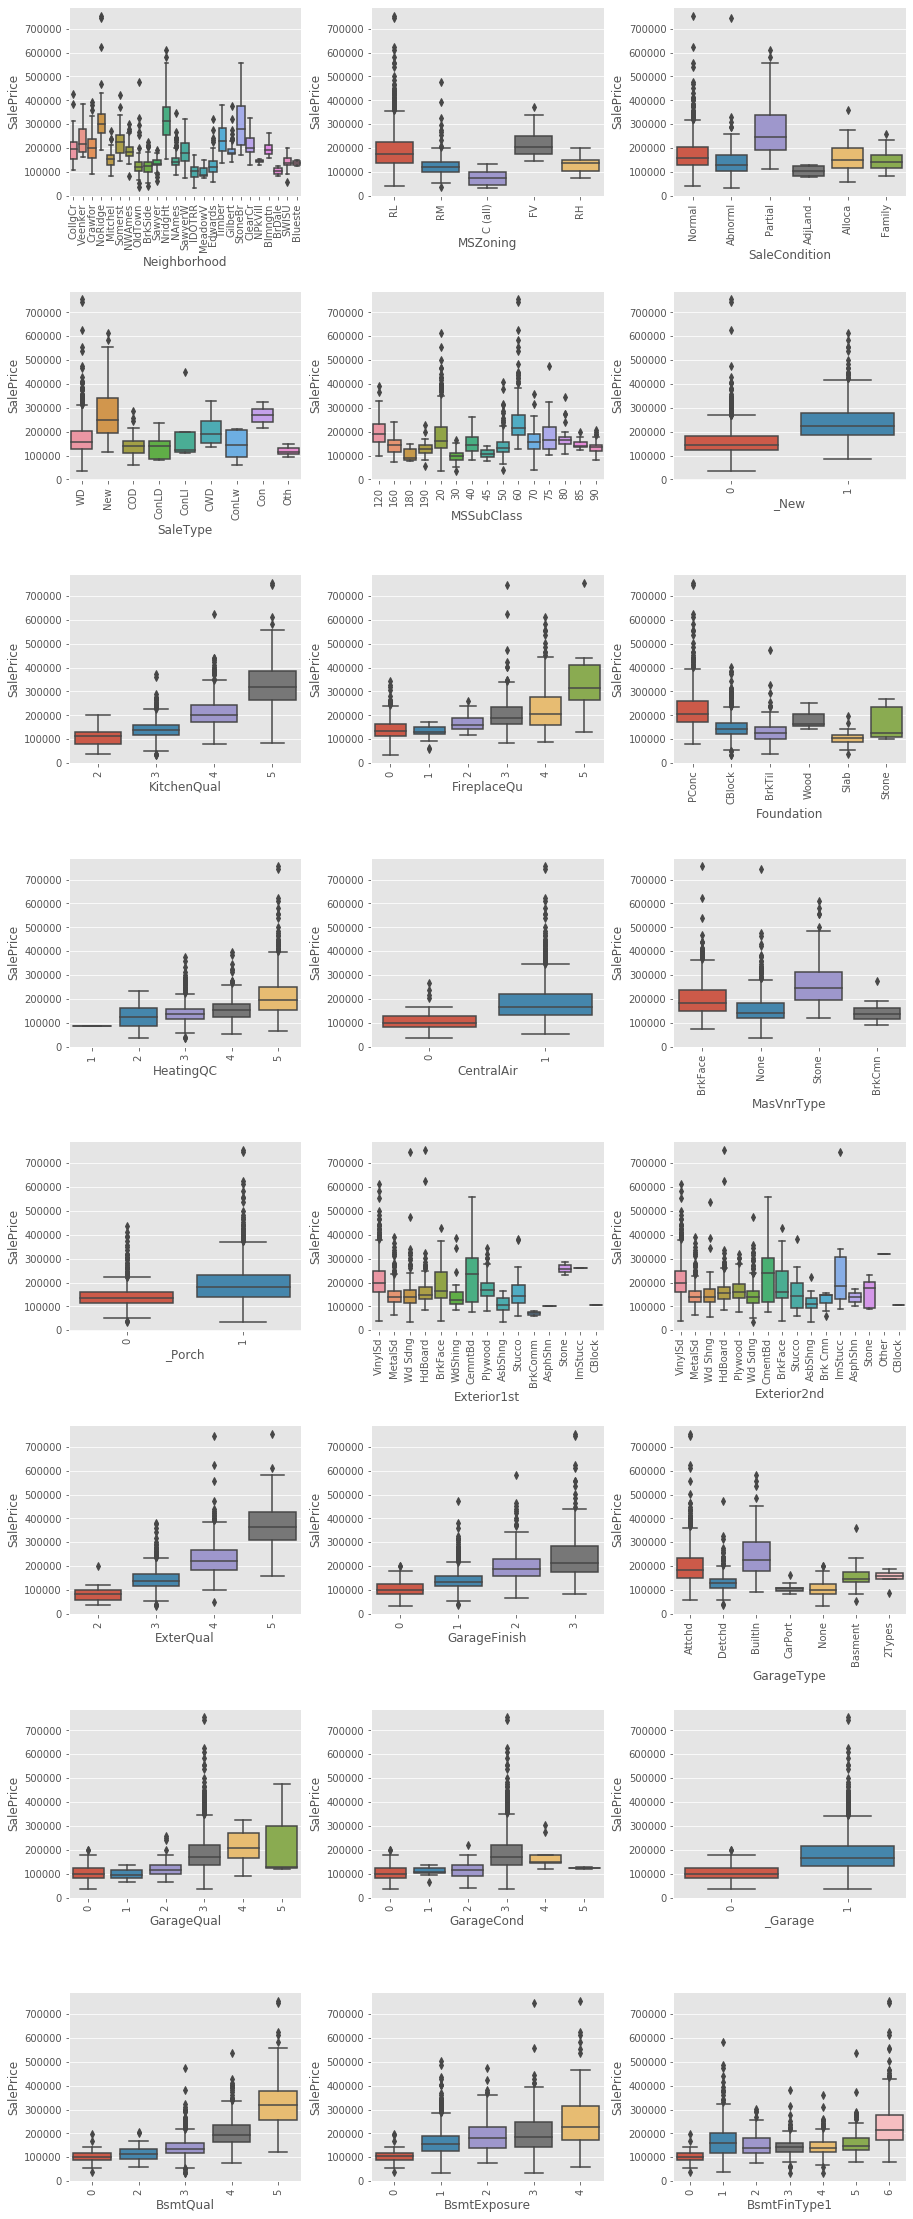

In [522]:
# plt.subplots(nrows, ncols, figsize=(width, height))
nc, nr  = 3, math.ceil(len(cat_influential)//nc)
f,axes = plt.subplots(nr, nc, figsize=(nc*5, nr*5))
f.subplots_adjust(hspace=.5, wspace=.3,)

counter = 0
for f in cat_influential:
    ax = sns.boxplot(f, 'SalePrice', data=train, ax = axes[counter//n][counter%n])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    counter+=1